<Figure size 432x288 with 0 Axes>

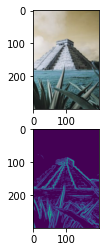

In [5]:
#ETAPA DO DESENVOLVIMENTO DO ALGORITMO

# Redução de ruído usando filtro Gaussiano 
  #Remoção do ruído da imagem

# Cálculo do gradiente ao longo dos eixos horizontal e vertical 
  #Convolução de kernels Sobel-Feldman. 
  #Depois de aplicar esses kernel, podemos usar as magnitudes do gradiente e o ângulo para processar ainda mais esta etapa 

# Supressão não máxima de bordas falsas
  #Reduzir os pixels de mesclagem duplicados ao longo das bordas para torná-los irregulares. 
  #Para cada pixel, encontre dois vizinhos nas direções do gradiente positiva e negativa, 
  #supondo que cada vizinho ocupe o ângulo pi / 4 e 0 seja a direção diretamente para a direita. 
  #Se a magnitude do pixel atual é maior que a magnitude dos vizinhos, nada muda, caso contrário, 
  #a magnitude do pixel atual é definida como zero.

# Limiar duplo para segregar bordas fortes e fracas
  #As magnitudes do gradiente são comparadas com dois valores de limite especificados, 
  #o primeiro é menor que o segundo. Os gradientes que são menores que o valor de limite baixo são suprimidos, 
  #os gradientes mais altos que o valor de limite alto são marcados como fortes e os pixels correspondentes são incluídos no mapa de borda final. 
  #Todos os gradientes restantes são marcados como fracos e os pixels correspondentes a esses gradientes são considerados na próxima etapa.

# Rastreamento de borda por histerese
  #Uma vez que um pixel de borda fraca causado por bordas verdadeiras será conectado a um pixel de borda forte, 
  #o pixel W com gradiente fraco é marcado como borda e incluído no mapa de borda final 
  #se e somente se estiver envolvido no mesmo componente conectado que algum pixel S com forte gradiente.

import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 
  
   
   
def Canny_detector(img, weak_th = None, strong_th = None): 
      
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    img = cv2.GaussianBlur(img, (5, 5), 1.4) 
           
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
      
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
      
    mag_max = np.max(mag) 
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    height, width = img.shape 
      
    for i_x in range(width): 
        for i_y in range(height): 
          grad_ang = ang[i_y, i_x] 
          grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
          if grad_ang<= 22.5: 
            vizinho_1_x, vizinho_1_y = i_x-1, i_y 
            vizinho_2_x, vizinho_2_y = i_x + 1, i_y 
          elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
            vizinho_1_x, vizinho_1_y = i_x-1, i_y-1
            vizinho_2_x, vizinho_2_y = i_x + 1, i_y + 1
          elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
            vizinho_1_x, vizinho_1_y = i_x, i_y-1
            vizinho_2_x, vizinho_2_y = i_x, i_y + 1
          elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
            vizinho_1_x, vizinho_1_y = i_x-1, i_y + 1
            vizinho_2_x, vizinho_2_y = i_x + 1, i_y-1
          elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
            vizinho_1_x, vizinho_1_y = i_x-1, i_y 
            vizinho_2_x, vizinho_2_y = i_x + 1, i_y 
          if width>vizinho_1_x>= 0 and height>vizinho_1_y>= 0: 
            if mag[i_y, i_x]<mag[vizinho_1_y, vizinho_1_x]: 
              mag[i_y, i_x]= 0
              continue
        if width>vizinho_2_x>= 0 and height>vizinho_2_y>= 0: 
          if mag[i_y, i_x]<mag[vizinho_2_y, vizinho_2_x]: 
              mag[i_y, i_x]= 0

    weak_ids = np.zeros_like(img) 
    strong_ids = np.zeros_like(img)               
    ids = np.zeros_like(img) 
       
    
    for i_x in range(width): 
        for i_y in range(height): 
            grad_mag = mag[i_y, i_x] 
            if grad_mag<weak_th: 
              mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th: 
                ids[i_y, i_x]= 1
            else: 
                ids[i_y, i_x]= 2
       
       
    
    
    return mag 
   
frame = cv2.imread('teste.jpeg') 
canny_img = Canny_detector(frame) 
   
plt.figure() 
f, plots = plt.subplots(2, 1)  
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 